#  Classical data: Edgar Anderson’s Iris data 

Kowing the data

In [1]:
# install.packages("clue",repos="http://cran.uk.r-project.org")
# install.packages("fpc",repos="http://cran.uk.r-project.org")
library(dplyr)
library(fpc)
library(clue)
library("doBy")
head(iris)
names(iris)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'fpc' was built under R version 3.3.3"Warning message:
"package 'clue' was built under R version 3.3.3"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

Seperate labels and data

In [2]:
train.data=iris[,-5]
train.label=iris[,5]


Arranging the data into 3 clusters based 3 features

In [4]:
data=sample(1:10,10,replace=FALSE)
data

[1]  1  4  7  9  6  5 10  2  8  3

In [10]:
x=kmeans(data,c(2,4,7),3)
x

K-means clustering with 3 clusters of sizes 3, 3, 4

Cluster means:
  [,1]
1  2.0
2  5.0
3  8.5

Clustering vector:
 [1] 1 2 3 3 2 2 3 1 3 1

Within cluster sum of squares by cluster:
[1] 2 2 5
 (between_SS / total_SS =  89.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [12]:
x$cluster

[1] 1 2 3 3 2 2 3 1 3 1

In [4]:
kmeans_default=kmeans(train.data,3)

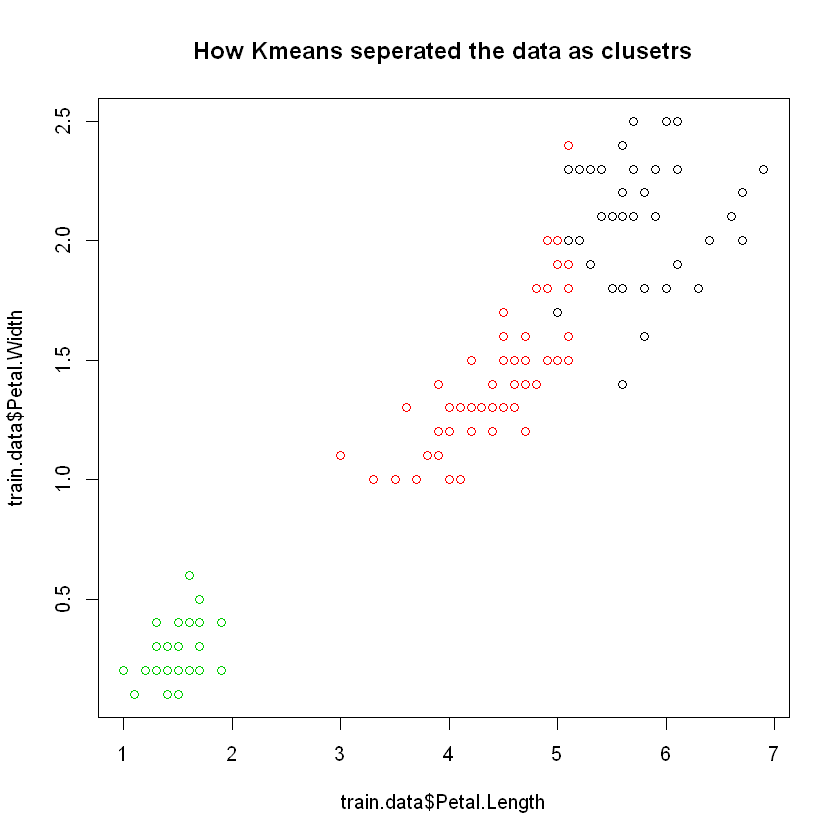

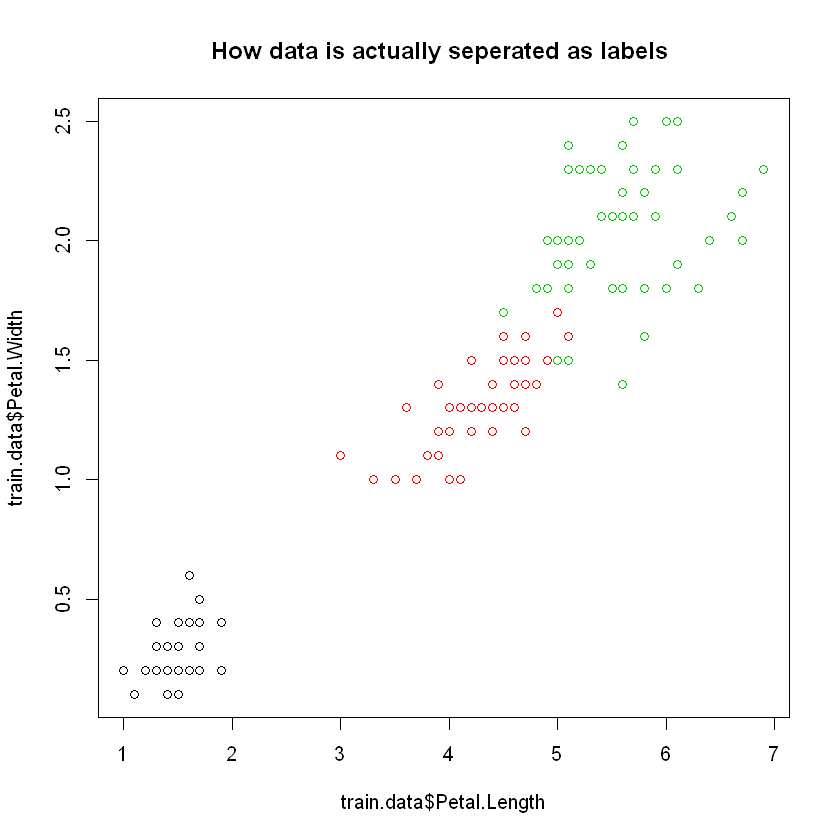

In [16]:
plot(train.data$Petal.Length,train.data$Petal.Width,col=kmeans_default$cluster,main="How Kmeans seperated the data as clusetrs")
plot(train.data$Petal.Length,train.data$Petal.Width,col=train.label,main="How data is actually seperated as labels ")

# table(y,kc$cluster)
# head(data.frame(y,kc$cluster))

# It can be observed that the way kmeans has seperated data into clusters is very similar to the actual

Check the centroids

In [5]:
# kc$centers


In [6]:
kmeans_Hartigan=kmeans(train.data, 3, iter.max = 10, nstart = 1,
algorithm = c("Hartigan-Wong"), trace=FALSE)

kmeans_Lloyd=kmeans(train.data, 3, iter.max = 10, nstart = 1,
algorithm = c("Lloyd"), trace=FALSE)

kmeans_Forgy=kmeans(train.data, 3, iter.max = 10, nstart = 1,
algorithm = c("Forgy"), trace=FALSE)

kmeans_MacQueen=kmeans(train.data, 3, iter.max = 10, nstart = 1,
algorithm = c("MacQueen"), trace=FALSE)



In [7]:
df_trained=data.frame(train.label,kmeans_Hartigan$cluster,kmeans_Lloyd$cluster,kmeans_Forgy$cluster,
                     kmeans_MacQueen$cluster)

In [8]:
# df_predict.factor=mutate_if(df_predict,is.integer,as.factor)

In [9]:
print("--------------Hartigan-Wong--------------")
table(train.label,df_trained$kmeans_Hartigan.cluster)
print("--------------Lloyd--------------")
table(train.label,df_trained$kmeans_Lloyd.cluster)
print("--------------Forgy--------------")
table(train.label,df_trained$kmeans_Forgy.cluster)
print("--------------MacQueen--------------")
table(train.label,df_trained$kmeans_MacQueen.cluster)

[1] "--------------Hartigan-Wong--------------"


            
train.label   1  2  3
  setosa     47  0  0
  versicolor  0 40  3
  virginica   0  9 21

[1] "--------------Lloyd--------------"


            
train.label   1  2  3
  setosa     47  0  0
  versicolor  0 40  3
  virginica   0  9 21

[1] "--------------Forgy--------------"


            
train.label   1  2  3
  setosa     47  0  0
  versicolor  0  3 40
  virginica   0 21  9

[1] "--------------MacQueen--------------"


            
train.label   1  2  3
  setosa     47  0  0
  versicolor  0 13 30
  virginica   0 29  1

In [10]:

x=cl_predict(kmeans_Lloyd,train.data)
table(train.label,x)

            x
train.label   1  2  3
  setosa     47  0  0
  versicolor  0 40  3
  virginica   0  9 21

In [26]:
iris.mean=group_by(iris,Species)%>%
summarise_each(funs(mean(., na.rm=TRUE)), -Species)


# Cluster Plot against 1st 2 principal components

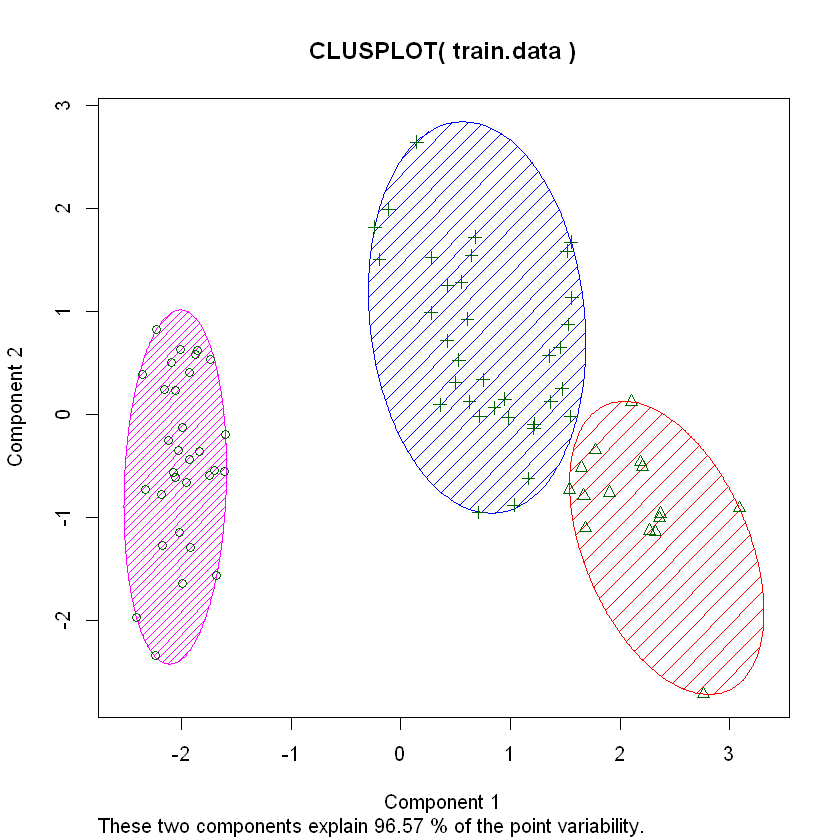

In [11]:
library(cluster) 
clusplot(train.data, kmeans_Forgy$cluster, color=TRUE, shade=TRUE, 
   labels=1, lines=0)


In [12]:
# comparing 2 cluster solutions

cluster.stats(train.data, kmeans_Forgy$cluster, kmeans_Lloyd$cluster) 

Warning message in as.dist.default(d):
"non-square matrix"Warning message in as.matrix.dist(d):
"number of items to replace is not a multiple of replacement length"

$n
[1] 120

$cluster.number
[1] 3

$cluster.size
[1] 47 24 49

$min.cluster.size
[1] 24

$noisen
[1] 0

$diameter
[1] 7.7 7.6 7.7

$average.distance
[1] 3.340426 3.256522 3.332228

$median.distance
[1] 3.0 3.0 3.1

$separation
[1] 0.1 0.1 0.1

$average.toother
[1] 3.438852 3.326519 3.404944

$separation.matrix
     [,1] [,2] [,3]
[1,]  0.0  0.1  0.1
[2,]  0.1  0.0  0.1
[3,]  0.1  0.1  0.0

$ave.between.matrix
         [,1]     [,2]     [,3]
[1,] 0.000000 3.376418 3.469431
[2,] 3.376418 0.000000 3.278656
[3,] 3.469431 3.278656 0.000000

$average.between
[1] 3.39796

$average.within
[1] 3.327477

$n.between
[1] 4607

$n.within
[1] 2533

$max.diameter
[1] 7.7

$min.separation
[1] 0.1

$within.cluster.ss
[1] 870.2177

$clus.avg.silwidths
          1           2           3 
-0.03117254 -0.03571996 -0.04360627 

$avg.silwidth
[1] -0.03715913

$g2
NULL

$g3
NULL

$pearsongamma
[1] 0.01717901

$dunn
[1] 0.01298701

$dunn2
[1] 0.9815086

$entropy
[1] 1.054747

$wb.ratio
[1] 0.9792575

$ch
[1] 

Plot the clusters and their centres. Note that there are four dimensions in the data and that only the first two dimensions are used to draw the plot below. Some black points close to the green centre (asterisk) are actually closer to the black centre in the four dimensional space.

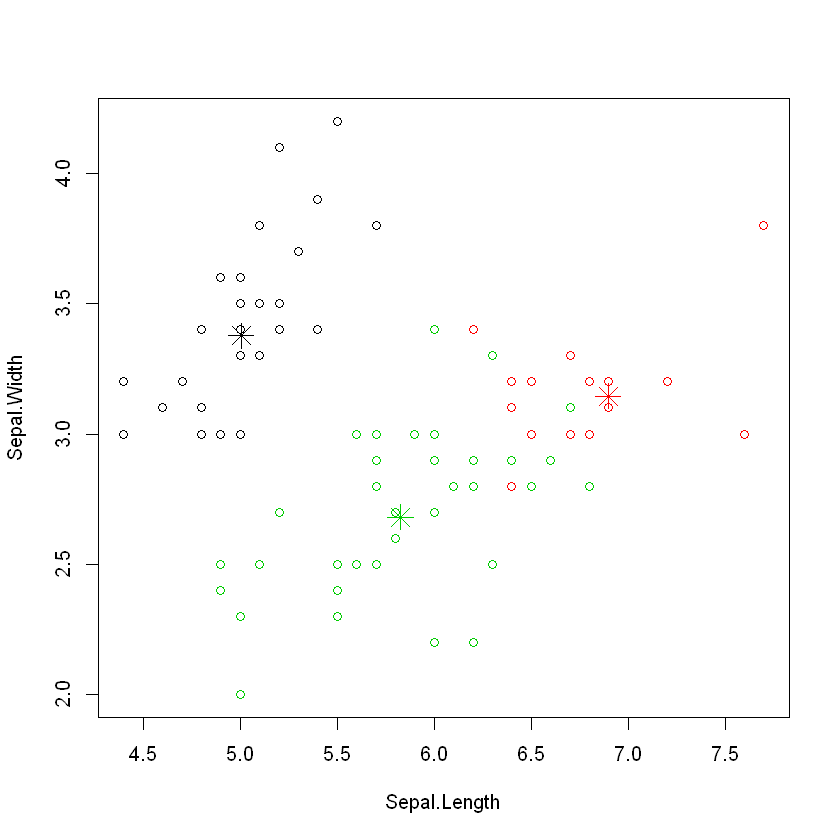

In [13]:
plot(train.data[c("Sepal.Length", "Sepal.Width")], col=kmeans_Forgy$cluster)
points(kmeans_Forgy$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=2)

In [28]:
print("--------------Hartigan-Wong--------------")
kmeans_Hartigan$centers
print("--------------Lloyd--------------")
kmeans_Lloyd$centers
print("--------------Forgy--------------")
kmeans_Forgy$centers
print("--------------MacQueen--------------")
kmeans_MacQueen$centers

[1] "--------------Hartigan-Wong--------------"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.004255,3.376596,1.497872,0.2531915
2,5.826531,2.681633,4.297959,1.3836735
3,6.895833,3.145833,5.683333,2.0458333


[1] "--------------Lloyd--------------"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.004255,3.376596,1.497872,0.2531915
2,5.826531,2.681633,4.297959,1.3836735
3,6.895833,3.145833,5.683333,2.0458333


[1] "--------------Forgy--------------"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.004255,3.376596,1.497872,0.2531915
2,6.895833,3.145833,5.683333,2.0458333
3,5.826531,2.681633,4.297959,1.3836735


[1] "--------------MacQueen--------------"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.004255,3.376596,1.497872,0.2531915
2,6.621429,2.969048,5.319048,1.8523810
3,5.577419,2.651613,3.987097,1.2612903
